In [2]:
pip install nltk

  Using cached nltk-3.8-py3-none-any.whl (1.5 MB)
  Using cached regex-2022.10.31-cp38-cp38-macosx_10_9_x86_64.whl (294 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib

In [83]:
import nltk.stem
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

In [87]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [73]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/carolina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
mainDf = pd.read_csv("mainJustice.csv")
mainDf = mainDf.drop(['Unnamed: 0'], axis=1)
mainDf

,ID,facts,issue_area,first_party_winner
0,50606,"<p>In 1970, Jane Roe (a fictional name used in...",3,1
1,50613,<p>Joan Stanley had three children with Peter ...,0,1
2,50623,<p>John Giglio was convicted of passing forged...,1,1
3,50632,"<p>The Idaho Probate Code specified that """"""""m...",0,1
4,50643,"<p>Miller, after conducting a mass mailing cam...",2,1
...,...,...,...,...
3283,63323,<p>Tarahrick Terry pleaded guilty to one count...,3,0
3284,63324,"<p>Refugio Palomar-Santiago, a Mexican nationa...",3,1
3285,63331,<p>Joshua James Cooley was parked in his picku...,0,1
3286,63332,<p>This is an ongoing case of original jurisdi...,3,0


In [46]:
documents = []
X = mainDf["facts"]

for i in range(0, len(X)):
  document = re.sub(r"\W", " ", str(X[i]))
  document = re.sub(r"\d+", " ", document)
  document = re.sub(r'\b\w{1,1}\b', " ", document)
  document = re.sub(" \d+", " ", document)
  document = re.sub(r"\s+", " ", document, flags=re.I)
  document = document.lower()
  documents.append(document)

In [47]:
tokenDocuments = []
for i in range(0, len(X)):
    tokenDocuments.append(word_tokenize(documents[i]))

In [48]:
stop_words = stopwords.words("english")

In [49]:
cleanTokenDocuments = []

for i in range(0, len(X)):
    cleanTokenDocument = []
    for word in tokenDocuments[i]:
        if word not in stop_words:
            cleanTokenDocument.append(word)
    cleanTokenDocuments.append(cleanTokenDocument)

In [50]:
for i in range(0, len(X)):
    mainDf["facts"][i] = cleanTokenDocuments[i]

/var/folders/ws/5cwbl8gj2ql8jp5jlbsm15g00000gn/T/ipykernel_46910/2850290269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mainDf["facts"][i] = cleanTokenDocuments[i]


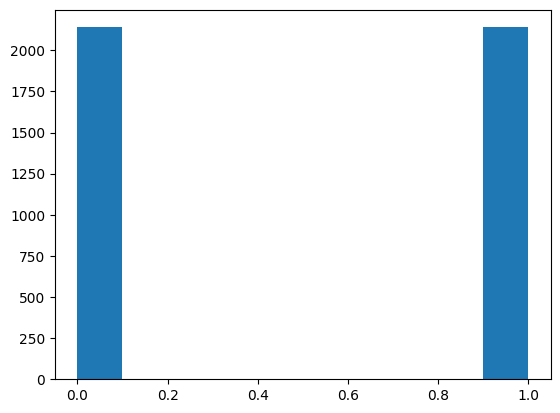

In [51]:
max_size = mainDf["first_party_winner"].value_counts().max() 
lst = [mainDf]
for class_index, group in mainDf.groupby('first_party_winner'):
    lst.append(group.sample(max_size-len(group), replace=True))
balancedMainDf = pd.concat(lst)
balancedMainDf.index = range(len(balancedMainDf))
plt.hist(balancedMainDf["first_party_winner"])
plt.show()

In [52]:
len(balancedMainDf)

4280

In [74]:
lemma = WordNetLemmatizer()

mainDf["lemma"] = mainDf["facts"].apply(lambda x: [lemma.lemmatize(y) for y in x])

In [89]:
for i in range(0, len(mainDf["lemma"])):
    mainDf["lemma"][i] = nltk.pos_tag(mainDf["lemma"][i])

/var/folders/ws/5cwbl8gj2ql8jp5jlbsm15g00000gn/T/ipykernel_46910/4046372003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mainDf["lemma"][i] = nltk.pos_tag(mainDf["lemma"][i])


In [53]:
minuBetweenWords = 200000
maxBetweenWords = 0
for i in mainDf["facts"]:
    if len(i) <= minuBetweenWords:
        minuBetweenWords = len(i)
    if len(i) >= maxBetweenWords:
        maxBetweenWords = len(i)

In [58]:
minuBetweenWords

2

In [57]:
for i in mainDf["facts"]:
    if len(i) >= 534:
        print(i)


['august', 'joel', 'perez', 'carlos', 'cruz', 'drove', 'shell', 'station', 'arlington', 'heights', 'illinois', 'cruz', 'wheel', 'met', 'alejandro', 'diaz', 'working', 'drug', 'enforcement', 'agency', 'dea', 'officials', 'diaz', 'instructed', 'meet', 'different', 'location', 'complete', 'deal', 'instead', 'perez', 'walked', 'nearby', 'denny', 'alexander', 'vasquez', 'waited', 'driver', 'seat', 'black', 'pontiac', 'bonneville', 'perez', 'got', 'passenger', 'seat', 'bonneville', 'called', 'cruz', 'telling', 'willing', 'follow', 'diaz', 'cruz', 'walked', 'denny', 'introduced', 'vasquez', 'diaz', 'called', 'cruz', 'ask', 'following', 'cruz', 'informed', 'wanted', 'complete', 'deal', 'denny', 'parking', 'lot', 'telling', 'got', 'money', 'vasquez', 'echoed', 'statement', 'diaz', 'contacted', 'dea', 'handler', 'agent', 'james', 'chupik', 'law', 'enforcement', 'agents', 'surrounded', 'parking', 'lot', 'vehicles', 'several', 'officers', 'approached', 'bonneville', 'arrest', 'vasquez', 'cruz', 'p

In [56]:
re.sub(r'\b\w{1,1}\b', '', 'I am in a bank.')

' am in  bank.'